## Prediction of the number of system errors depending on the number of months since system release using a logit model (comparison of Hotelling parameter estimation and minimization of prediction error using the minimize function from Scipy)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Prepare data

In [ ]:
data = {
't': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
     21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
     39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
     57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
     75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93],
'failures': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 9, 0, 0, 3, 1,
             1, 0, 1, 0, 2, 10, 0, 16, 0, 2, 2, 1, 1, 1, 0, 3, 2, 1, 6, 3, 0, 1,
             1, 0, 0, 14, 1, 4, 1, 1, 7, 14, 6, 0, 1, 2, 19, 7, 2, 5, 1, 12, 4, 6,
             4, 7, 2, 2, 3, 8, 4, 6, 3, 3, 5, 8, 0, 6, 5, 10, 0, 5, 1, 2, 1, 2, 1, 0]
}

In [ ]:
data = pd.DataFrame(data)

In [ ]:
data['cumulative_failures'] = data['failures'].cumsum()

## Define function for Hotelling estimation and using Scipy minimize

In [ ]:
def logit_hotelling(x, y):
  mean_y = np.mean(y)
  d_y = np.diff(y)
  y_cut = y[1:]
  n = x.shape[0]
  sum_d_y_y = np.sum(d_y / y_cut)

  a = 1 / (n - 1) * sum_d_y_y - np.sum((y_cut - mean_y) *
   (d_y / y_cut - 1 / (n - 1) * sum_d_y_y)) / np.sum((y_cut - mean_y)**2) * mean_y

  k = -(a * np.sum((y_cut - mean_y)**2)) / np.sum((y_cut - mean_y) *
   (d_y / y_cut - 1 / (n - 1) * sum_d_y_y))

  b = np.exp((np.sum(np.log(k / y - 1)) + a * np.sum(x)) / n)

  return a, b, k

In [ ]:
def logit_minimize_error(x, y):
    def logit(k, a, b, x):
        return k / (1 + b * np.exp(-a * x))

    def obj(args):
        logit_result = x.apply(lambda val: logit(args[0], args[1], args[2], val))
        squared_errors = (y - logit_result)**2
        squared_errors_sum = np.sum(squared_errors)
        return squared_errors_sum

    return minimize(obj, [2, 2, 2])

## Estimate logit model parameters

In [ ]:
a_h, b_h, k_h = logit_hotelling(data['t'], data['cumulative_failures'])
print(k_h, a_h, b_h)

318.2293155927951 0.06649497935443306 130.2115047444905


In [ ]:
result_scipy_minimize = logit_minimize_error(data['t'], data['cumulative_failures'])
k_sm, a_sm, b_sm = result_scipy_minimize['x']
print(k_sm, a_sm, b_sm)

310.3845305380019 0.06868040778051689 91.33453984319162


## Compare models

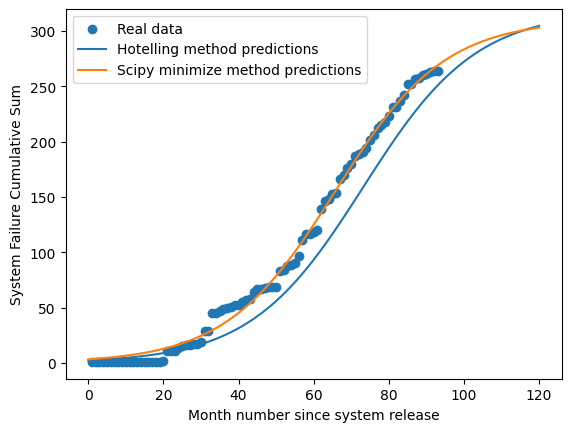

In [ ]:
x = np.linspace(0, 120, 120)
plt.scatter(data['t'], data['cumulative_failures'], label='Real data')
plt.plot(x, k_h / (1 + b_h * np.exp(-a_h * x)), label='Hotelling method predictions')
plt.plot(x, k_sm / (1 + b_sm * np.exp(-a_sm * x)), label='Scipy minimize method predictions')
plt.ylabel('System Failure Cumulative Sum')
plt.xlabel('Month number since system release')
plt.legend()